# FOREX EURUSD ANALYSIS

### Process at a high level
1. <h4>Data : We will use MT5 to download data and use that data for backtesting as all it needs is close price</h4>
1. <h4>Data Prep : We perform data cleanup and create required fields like Simple Moving Average for Short and Long Postions, returns, etc.</h4>
1. <h4>Analysis : We will exlore the data and trend using bollinger bands. We will then proceed with creating strategy for our trading using SMA Crossover strategy for minute, 5 minute and daily data.</h4>
1. <h4>Backtesting : We will split the data into 2 periods and will use the data with older period for backtesting to find profitable strategy.</h4>
1. <h4>Optimization : We will run further anlaysis to identify the optimized the short and long parameters for our strategy.</h4>
1. <h4>Forward testing : We will use the second part of the split data to do forward testing to make sure that the strategy is profitable in both backtesting and forward testing scenario.</h4>
1. <h4>Programming approach : We will do our analysis through unstructured programming, functional programming and object-programming, developing and understanding of how we simplify execution when we move from unstructured programming to object-oriented programming.</h4>

### Knowledge and Code References


1. <h4>Udemy : Forex strategies for algorithmic trading 2022 - Lucas Inglese</h4>
1. <h4>Udemy : Algorithmic Trading A-Z with Python, Machine Learning & AWS - Alexander Hagmann</h4>
1. <h4>Book : The Art of Currency Trading - Brent Donnelly</h4>
1. <h4>Book : Machine Learning for Algorithmic Trading - Stefan Jansen</h4>

### Downloading forex history data from MT5
In MT5 we can generate historic data for the period we require to do the analysis and export the result locally in CSV file. 

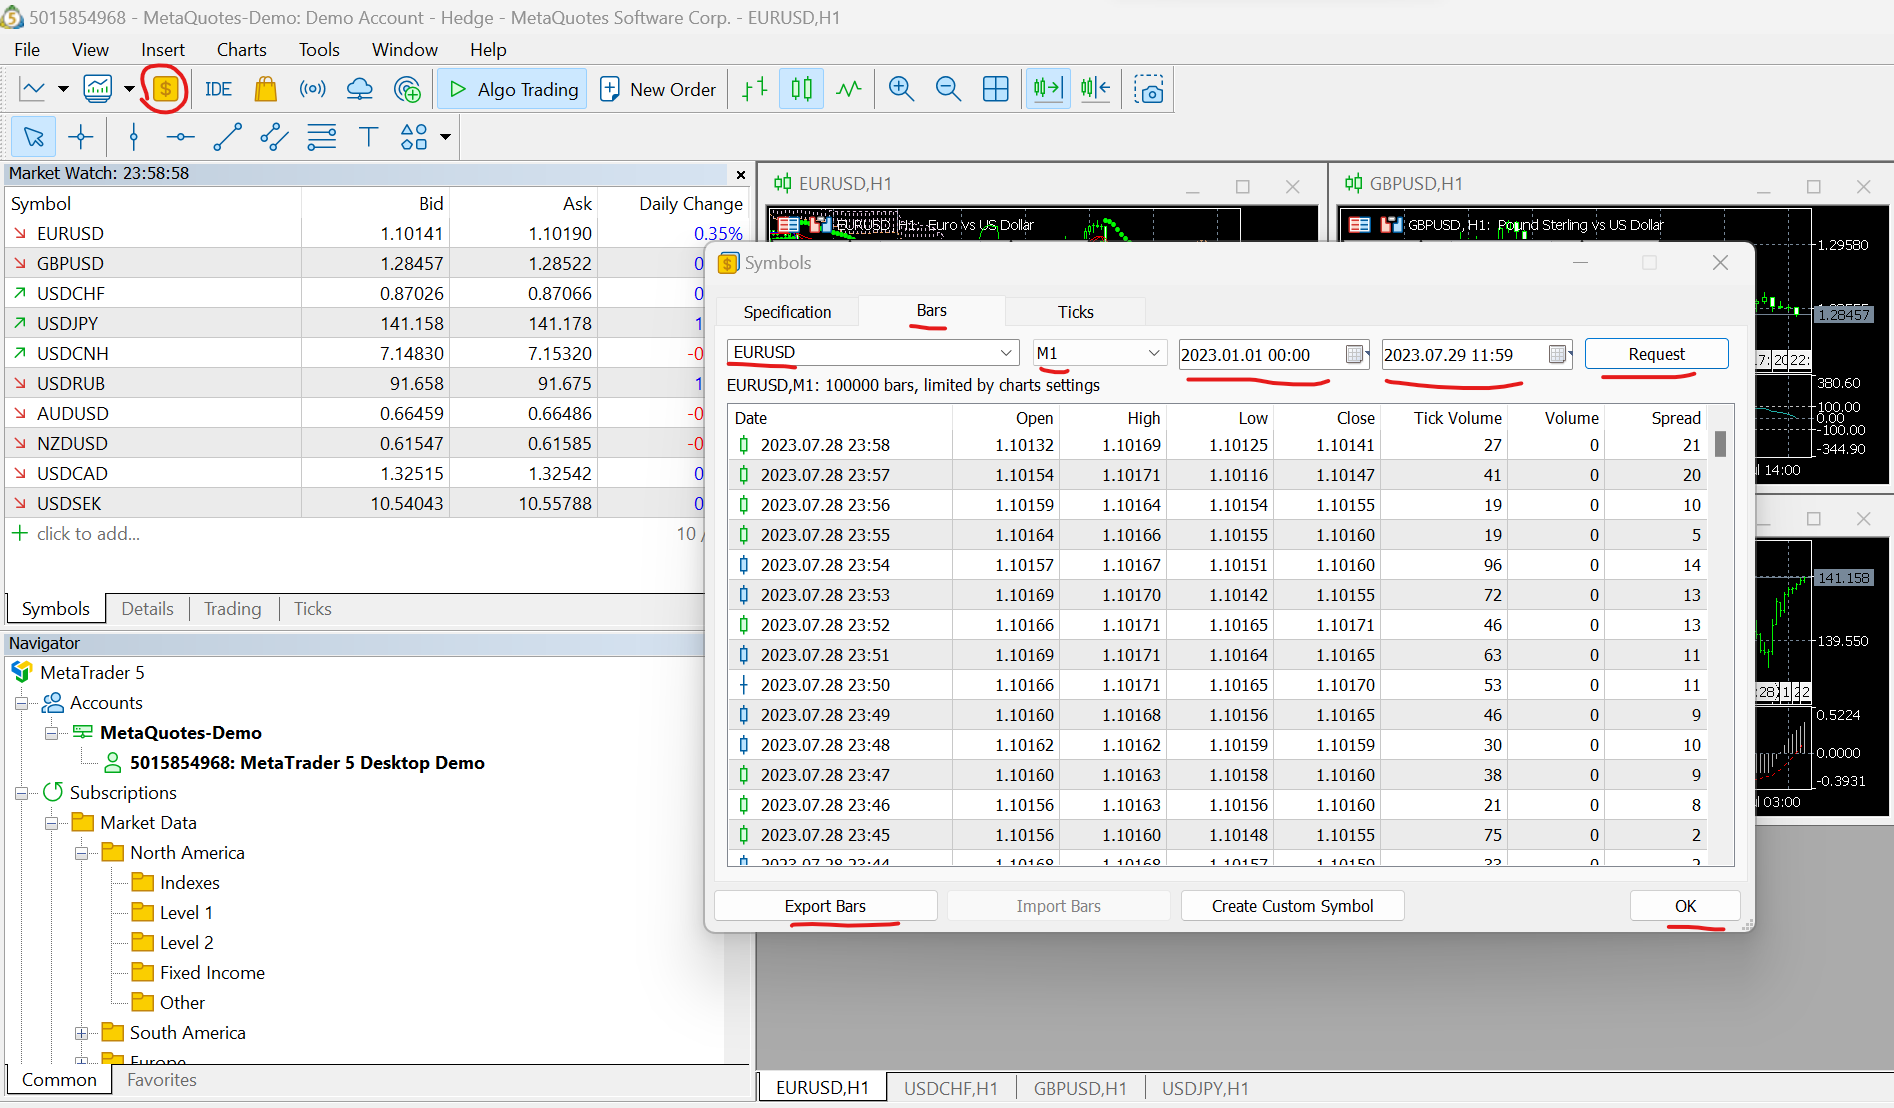

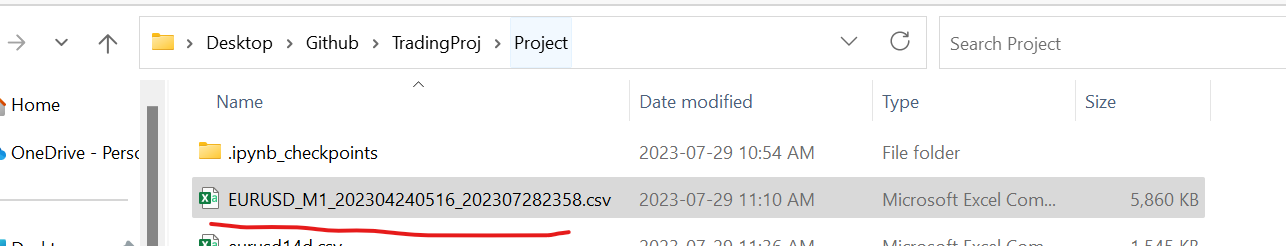

**Note** : Eventhough we mentioned data from Jan, it was only downloaded from April due to settings of 10000 rows. Its good for analysis but need to be explored further if we need more data.

## Unstructured Approach

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from ta.volatility import BollingerBands
import warnings
warnings.filterwarnings("ignore")
from scipy.optimize import brute
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cycler

In [2]:
# The code here will switch charts to dark mode 

colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

In [3]:
#we will start with our analysis with minute data we have downloaded through MT5 for our Analysis
df_test = pd.read_csv("datasets/EURUSD_M1_202304240516_202307282358.csv", delimiter="\t")
df_test.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2023.04.24,05:16:00,1.09880,1.09895,1.09880,1.09894,28,0,0
1,2023.04.24,05:17:00,1.09894,1.09898,1.09893,1.09895,38,0,0
2,2023.04.24,05:18:00,1.09894,1.09902,1.09894,1.09900,34,0,0
3,2023.04.24,05:19:00,1.09900,1.09902,1.09899,1.09901,10,0,0
4,2023.04.24,05:20:00,1.09901,1.09904,1.09895,1.09897,38,0,1


In [4]:
# Preprocessing : remove unwanted fields and combine date and time as timestamp.
def preprocessing(name):

  #Import the data
  df = pd.read_csv(name, delimiter="\t")
  df['<DATETIME>'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'])
  
  df.drop(['<DATE>', '<TIME>'], axis=1, inplace=True)
  df.set_index('<DATETIME>', inplace=True)
  # Delete the two last columns
  df = df.iloc[:,:-2]

  #Rename
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "datetime" 
  return df

In [5]:
df = preprocessing("datasets/EURUSD_M1_202304240516_202307282358.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2023-04-24 05:16:00 to 2023-07-28 23:58:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    100000 non-null  float64
 1   high    100000 non-null  float64
 2   low     100000 non-null  float64
 3   close   100000 non-null  float64
 4   volume  100000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.6 MB


In [6]:
df.head()

,open,high,low,close,volume
datetime,,,,,
2023-04-24 05:16:00,1.09880,1.09895,1.09880,1.09894,28
2023-04-24 05:17:00,1.09894,1.09898,1.09893,1.09895,38
2023-04-24 05:18:00,1.09894,1.09902,1.09894,1.09900,34
2023-04-24 05:19:00,1.09900,1.09902,1.09899,1.09901,10
2023-04-24 05:20:00,1.09901,1.09904,1.09895,1.09897,38


### Bollinger Band Analysis

A Bollinger Band consists of a middle band (which is a moving average) and an upper and lower band. These upper and lower bands are set above and below the moving average by a certain number of standard deviations of price, thus incorporating volatility. The buy and sell decisions can be taken whenever middle band crosses the upper or lower bands. Strategies like 'Double Bottom' where the second low indicating a possible upward trend can be used to make trading decisions. 

In [7]:
# Initialization of Billinger Band Class
indicator_bb = BollingerBands(close=df["close"], window=60, window_dev=2)

# for the close priice we will create tow fields for high and low bands
df["bbl"] = indicator_bb.bollinger_lband()
df["bbh"] = indicator_bb.bollinger_hband()

#### The below charts shows price trend on a particular day with and without bollinger bands respectively

<Axes: xlabel='datetime'>

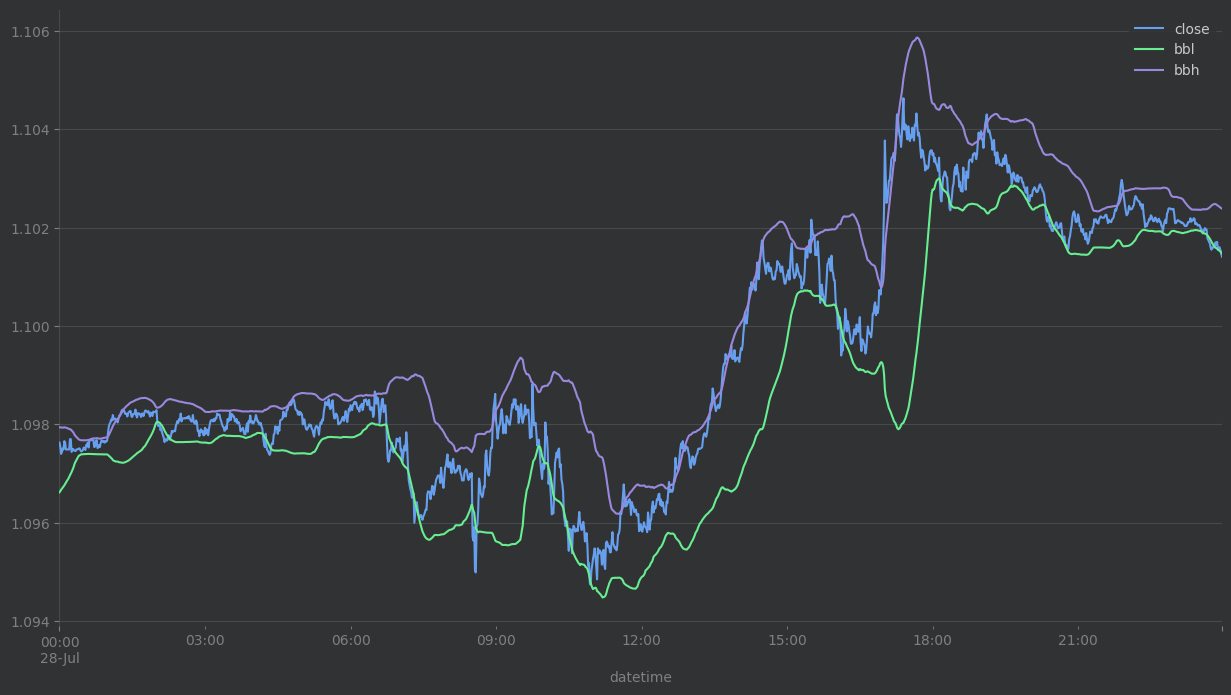

In [8]:
df[["close", "bbl", "bbh"]].loc["2023-07-28"].plot(figsize=(15,8))

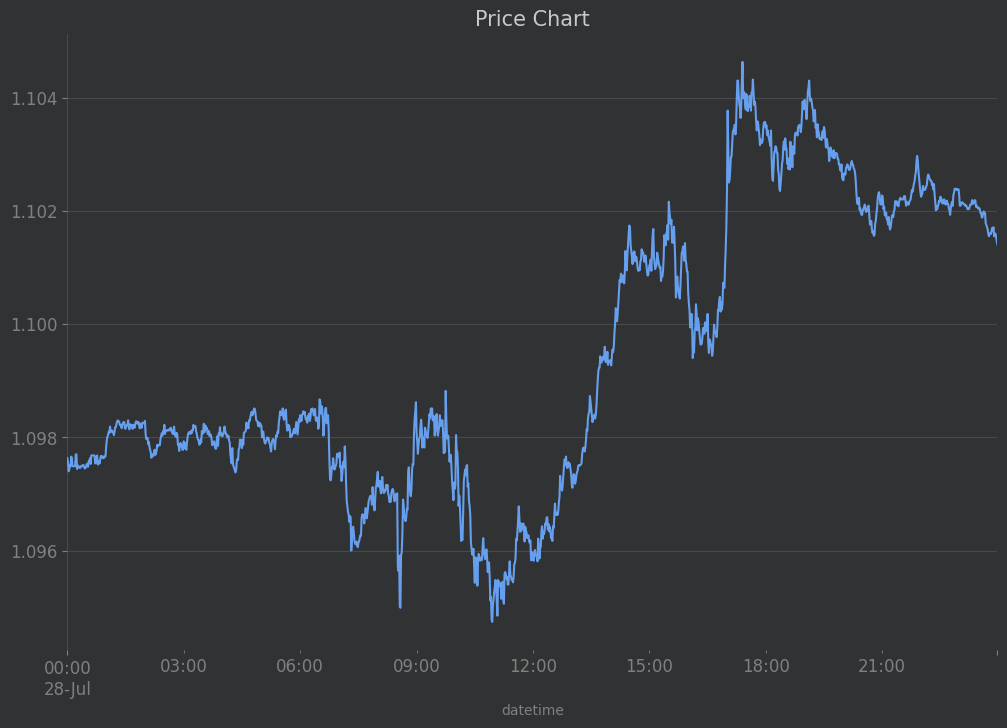

In [9]:
df["close"].loc["2023-07-28"].plot(figsize = (12, 8), fontsize = 12)
plt.title("Price Chart", fontsize = 15)
plt.show()

### SMA Crossover Strategy

__Underlying Idea:__ Momentum -> __most recent price trend persists__ in the near future
- SMA 50 captures the more recent price trend (vs. SMA 200)

__Trading Rules:__
   - If SMA 50 __crosses above__ the SMA 200, this can be viewed as an indicator for further price increases (__buy__ signal)
   - If SMA 50 __crosses below__ the SMA 200, this can be viewed as an indicator for further price decreases (__sell__ signal)

__Trading Positions:__

- __Buy__ means taking a __long__ position (+1)
- if short selling is 
 - allowed/desired, __Sell__ means taking a __short__ position (-1) 
 - not allowed/desired, __Sell__ means taking a __neutral__ position (0)

__In our analysis we will test Long-Short Strategy__

### 1. SMA Crossover strategy with minute level close price.

As our analysis would be primarily based on closing price, we will only include the data from close price for our analysis.

In [10]:
columns_to_keep = df.columns[[3]]
df_close = df[columns_to_keep]
df_close.head()

,close
datetime,
2023-04-24 05:16:00,1.09894
2023-04-24 05:17:00,1.09895
2023-04-24 05:18:00,1.09900
2023-04-24 05:19:00,1.09901
2023-04-24 05:20:00,1.09897


Below we are calculating returns at minute level by dividing 2 consecutive close prices and taking its log so as to minimize noise in the data and to add the returns.

In [11]:
returns = np.log(df_close.div(df_close.shift(1))).dropna()
returns.head()

,close
datetime,
2023-04-24 05:17:00,0.000009
2023-04-24 05:18:00,0.000045
2023-04-24 05:19:00,0.000009
2023-04-24 05:20:00,-0.000036
2023-04-24 05:21:00,-0.000055


In [12]:
returns.sum().apply(np.exp)

close    1.002248
dtype: float64

In [13]:
 df_close.iloc[-1] / df_close.iloc[0] 

close    1.002248
dtype: float64

As we could see from above the sum of the returns we calculated and the ratio of the last close price and first close price are same.

We use cumulative sum of the returns to identify the gain/loss

In [14]:
norm = returns.cumsum().apply(np.exp)
norm.head()

,close
datetime,
2023-04-24 05:17:00,1.000009
2023-04-24 05:18:00,1.000055
2023-04-24 05:19:00,1.000064
2023-04-24 05:20:00,1.000027
2023-04-24 05:21:00,0.999973


The below chart plots the return of buy and hold strategy over time using the normalized returns that we calculated above.

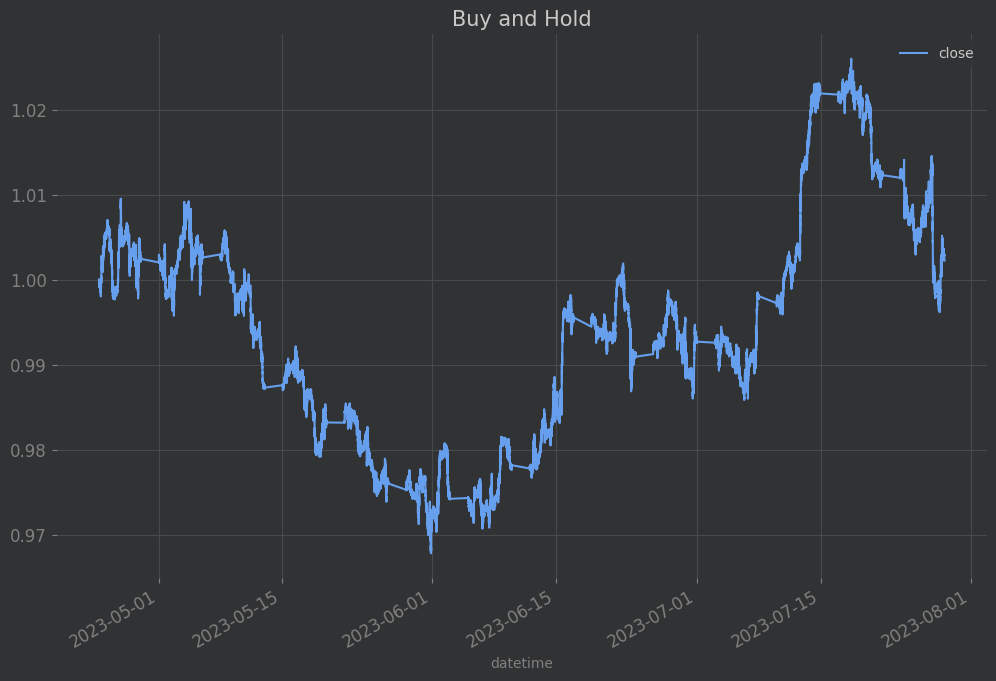

In [15]:
norm.plot(figsize = (12, 8), fontsize = 12)
plt.title("Buy and Hold", fontsize = 15)
plt.show()

In [16]:
df_close.columns = ["Price"]
df_close.head()

,Price
datetime,
2023-04-24 05:16:00,1.09894
2023-04-24 05:17:00,1.09895
2023-04-24 05:18:00,1.09900
2023-04-24 05:19:00,1.09901
2023-04-24 05:20:00,1.09897


We will use short period as 50 minutes and long period as 200 minutes for analysis.

In [17]:
sma_s = 50 # short period
sma_l = 200 # long period

We then calculate the simple moving average for short and long periods and returns for buy and hold strategy.

In [18]:
df_close["SMA_s"] =  df_close.Price.rolling(sma_s).mean()
df_close["SMA_l"] =  df_close.Price.rolling(sma_l).mean()
df_close["returns"] = np.log(df_close.Price.div(df_close.Price.shift(1))) #buy-and-hold
df_close

,Price,SMA_s,SMA_l,returns
datetime,,,,
2023-04-24 05:16:00,1.09894,NaN,NaN,NaN
2023-04-24 05:17:00,1.09895,NaN,NaN,0.000009
2023-04-24 05:18:00,1.09900,NaN,NaN,0.000045
2023-04-24 05:19:00,1.09901,NaN,NaN,0.000009
2023-04-24 05:20:00,1.09897,NaN,NaN,-0.000036
...,...,...,...,...
2023-07-28 23:54:00,1.10160,1.101937,1.102119,0.000045
2023-07-28 23:55:00,1.10160,1.101926,1.102117,0.000000
2023-07-28 23:56:00,1.10155,1.101915,1.102115,-0.000045


In [19]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2023-04-24 05:16:00 to 2023-07-28 23:58:00
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Price    100000 non-null  float64
 1   SMA_s    99951 non-null   float64
 2   SMA_l    99801 non-null   float64
 3   returns  99999 non-null   float64
dtypes: float64(4)
memory usage: 3.8 MB


In [20]:
#dropping records with close price as null
df_close.dropna(inplace = True)
df_close.head()

,Price,SMA_s,SMA_l,returns
datetime,,,,
2023-04-24 08:35:00,1.09766,1.097796,1.098185,0.000091
2023-04-24 08:36:00,1.09757,1.097784,1.098178,-0.000082
2023-04-24 08:37:00,1.09766,1.097775,1.098171,0.000082
2023-04-24 08:38:00,1.09761,1.097765,1.098164,-0.000046
2023-04-24 08:39:00,1.09757,1.097752,1.098157,-0.000036


The below plot shows long an short SMA along with price for a particular date. This shows where short and long lines cross over.

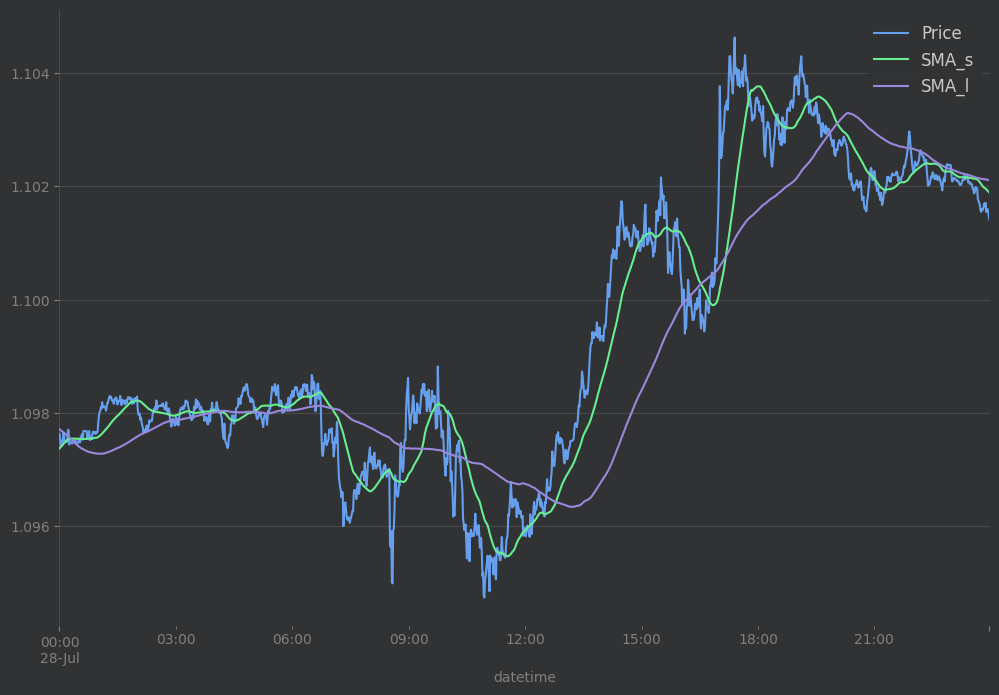

In [21]:
df_close.loc[:, ["Price","SMA_s", "SMA_l"]].loc["2023-07-28"].plot(figsize = (12, 8))
plt.legend(fontsize = 12)
plt.show()

We will execute our strategy of buying and selling based on short and long SMA crossover.

In [22]:
df_close["position"] = np.where(df_close["SMA_s"] > df_close["SMA_l"], 1, -1 )
df_close.head()

,Price,SMA_s,SMA_l,returns,position
datetime,,,,,
2023-04-24 08:35:00,1.09766,1.097796,1.098185,0.000091,-1
2023-04-24 08:36:00,1.09757,1.097784,1.098178,-0.000082,-1
2023-04-24 08:37:00,1.09766,1.097775,1.098171,0.000082,-1
2023-04-24 08:38:00,1.09761,1.097765,1.098164,-0.000046,-1
2023-04-24 08:39:00,1.09757,1.097752,1.098157,-0.000036,-1


The below chart shows buy and sell postions taken on a particular day. when the blue line(short) gores above the green line(long), our strategy takes buy position and if its the other way our strategy takes sell position.

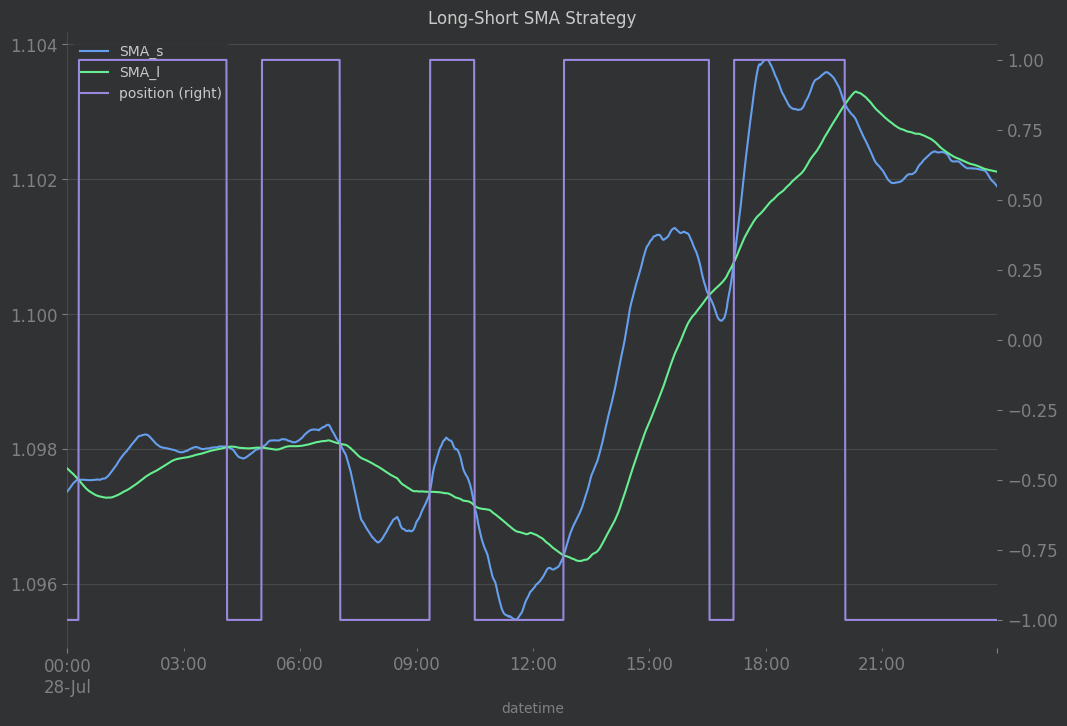

In [23]:
df_close.loc[:, ["SMA_s", "SMA_l", "position"]].loc["2023-07-28"].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position")
plt.title("Long-Short SMA Strategy")
plt.show()

We will now calcuate the return for SMA Crossover strategy and drop records with null values.

In [24]:
df_close["strategy"] = df_close.position.shift(1) * df_close["returns"] # strategy returns
df_close.dropna(inplace = True)
df_close.head()

,Price,SMA_s,SMA_l,returns,position,strategy
datetime,,,,,,
2023-04-24 08:36:00,1.09757,1.097784,1.098178,-0.000082,-1,0.000082
2023-04-24 08:37:00,1.09766,1.097775,1.098171,0.000082,-1,-0.000082
2023-04-24 08:38:00,1.09761,1.097765,1.098164,-0.000046,-1,0.000046
2023-04-24 08:39:00,1.09757,1.097752,1.098157,-0.000036,-1,0.000036
2023-04-24 08:40:00,1.09762,1.097742,1.098150,0.000046,-1,-0.000046


We will then calculate normalized returns for the 2 strategies and plot them to compare the returns.

In [25]:
df_close["bh_norm"] = df_close["returns"].cumsum().apply(np.exp)
df_close["strat_norm"] = df_close["strategy"].cumsum().apply(np.exp)

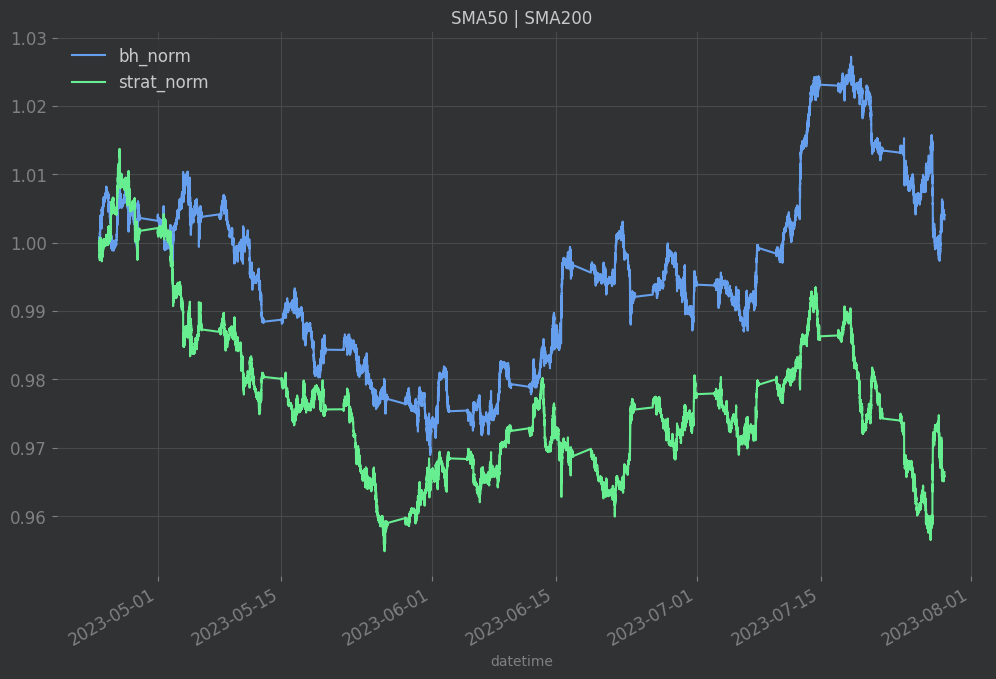

In [26]:
df_close[["bh_norm", "strat_norm"]].plot(figsize = (12, 8), title = "SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [27]:
outperform = df_close.strat_norm.iloc[-1] - df_close.bh_norm.iloc[-1]
outperform

-0.03696005348798148

### Summary
__The chart and the outperform(negative) value shows that our strategy underperforms buy-and-hold strategy at minute level. Now lets test the same strategy with data at 5 minute granularity.__

## Functional Programming Approach

### 2. SMA Crossover strategy 5 with minute level close price.

In [28]:
#5 minute data downloaded from MT5
name = "datasets/EURUSD_M5_202301020700_202307282355.csv"

In [29]:
# Preprocessing : remove unwanted fields and combine date and time as timestamp.
def preprocessing(name):

  #Import the data
  df = pd.read_csv(name, delimiter="\t")
  df['<DATETIME>'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'])
  df.drop(['<DATE>', '<TIME>'], axis=1, inplace=True)
  df.set_index('<DATETIME>', inplace=True)
  # Delete the two last columns
  df = df.iloc[:,:-2]

  #Rename
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "datetime"
  columns_to_keep = df.columns[[3]]
  df = df[columns_to_keep]
  df.columns = ["price"]
  return df



The below function combines all the steps needed to implement SMA Crossover analysis. The steps are:
1. Calculate simple moving average for short postition. 
1. Calculate simple moving average for long position.
1. Calculate returns based on buy-and-hold strategy.
1. Apply SMA crossover strategy of taking long ans short postions based on crossover.
1. Calculate returns from SMA Crossover Strategy.
1. Remove records with null values

In [30]:
def run_strategy(name,SMA):
    #data = df.copy()
    data = preprocessing(name)
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    return data[["returns", "strategy"]].sum().apply(np.exp) #multiple

We will now run our strategy for various parameters to evaluate the performance.

In [31]:
run_strategy("datasets/EURUSD_M5_202301020700_202307282355.csv",SMA = (50, 200))

returns     1.032656
strategy    1.037816
dtype: float64

In [32]:
run_strategy("datasets/EURUSD_M5_202301020700_202307282355.csv",SMA = (10, 50))

returns     1.030742
strategy    1.039211
dtype: float64

In [33]:
run_strategy("datasets/EURUSD_M5_202301020700_202307282355.csv",SMA = (22, 252))

returns     1.033247
strategy    1.088214
dtype: float64

Based on the above we can see for short and long parameters 50 and 200 and 10 and 50 respectively, our strategy is outperforming buy-and-hold strategy.

We will run the same function with return as negative multiple to minimize variance.

In [34]:
def run_strategy(SMA):
    data = preprocessing(name)
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1] # negative multiple -> minimize

__Optimization__

Instead of running our strategy manually and see the performance, we can use the below brute force method to find optimized paramters.

In [35]:
brute(run_strategy, ((10, 50), (100, 252)))

array([ 16.31578947, 180.        ])

We will now run our strategy for optimized parameters.

In [36]:
-run_strategy(SMA = (16.31578947, 180))

1.1295076515881446

### Summary
__The strategy return(positive) value shows that our strategy outperforms buy-and-hold strategy at 5 minute level.__

## Object Oriented Programming Approach

So far our analysis did not include costs. The below Backtester class includes cost factor as in our analyis as we can use this call in place of functional approach we did earlier.

In [37]:
class SMABacktester(): 
    ''' Class for the vectorized backtesting of SMA-based trading strategies.

    Attributes
    ==========
    filepath: str
        filename/path of the local csv file
    symbol: str
        ticker symbol to be tested
    SMA_S: int
        time window in days for shorter SMA
    SMA_L: int
        time window in days for longer SMA
    start: str
        start date for analysis
    end: str
        end date for analysis
    tc: float
        proportional transaction/trading costs per trade
    sell_pos: either -1 (default) or 0
        allow(-1) or disable (0) short-selling 
        
    Methods
    =======
    get_data:
        loads and prepares the data from csv
        
    set_parameters:
        sets one or two new SMA parameters und updates time-series
        
    test_strategy:
        runs the backtest for the SMA-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy-and-hold
        
    update_and_run:
        updates SMA parameters and returns the negative multiple (for minimizatio)
        
    optimize_parameters:
        implements a brute force optimization for the two SMA parameters
    '''
    
    def __init__(self, filepath, symbol, SMA_S, SMA_L, start, end, tc, sell_pos = -1):
        self.filepath = filepath
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.tc = tc
        self.sell_pos = sell_pos
        self.results = None 
        self.get_data()
        
    def __repr__(self):
        return "SMABacktester(symbol = {}, SMA_S = {}, SMA_L = {}, start = {}, end = {})".format(self.symbol, self.SMA_S, self.SMA_L, self.start, self.end)
  
    def get_data(self):
        ''' Loads and prepares the data.
        '''
        raw = pd.read_csv(self.filepath, delimiter="\t")
        raw['<DATETIME>'] = pd.to_datetime(raw['<DATE>'] + ' ' + raw['<TIME>'])
        raw.drop(['<DATE>', '<TIME>'], axis=1, inplace=True)
        raw.set_index('<DATETIME>', inplace=True)
        raw = raw.iloc[:,:-2]
        raw = raw.loc[self.start:self.end]
        raw.columns = ["open", "high", "low", "close", "volume"]
        raw.index.name = "datetime"
        columns_to_keep = raw.columns[[3]]
        raw = raw[columns_to_keep]
        raw.columns = ["price"]
        #raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and resp. time series.
        '''
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, self.sell_pos)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["bh_norm"] = data["returns"].cumsum().apply(np.exp)
        data["strat_norm"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["strat_norm"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["bh_norm"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy
        compared to buy-and-hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {} | TC = {}".format(self.symbol, self.SMA_S, self.SMA_L, self.tc)
            self.results[["strat_norm", "bh_norm"]].plot(title=title, figsize=(12, 8))
        
    def update_and_run(self, SMA):
        ''' Updates SMA parameters and returns the negative multiple (for minimization algorithm).

        Parameters
        ==========
        SMA: tuple
            SMA parameter tuple
        '''
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, SMA1_range, SMA2_range):
        ''' Finds global maximum given the SMA parameter ranges.

        Parameters
        ==========
        SMA1_range, SMA2_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (SMA1_range, SMA2_range), finish=None)
        return opt, -self.update_and_run(opt)

### 3. SMA Crossover strategy with minute level close price - Objects Oriented approach

In [38]:
#file exported from MT5
filepath = "datasets/EURUSD_M1_202304240516_202307282358.csv"

#### Parameter values for SMA strategy

In [39]:
start = "2023-04-24"
end = "2023-06-30"

In [40]:
symbol = "EURUSD"

In [41]:
sma_s = 50
sma_l = 200

We are now including the cost parameter.

In [42]:
ptc = 0.0005 

#### Backtesting

In [43]:
tester = SMABacktester(filepath, symbol, sma_s, sma_l, start, end, ptc, sell_pos = -1)
tester

SMABacktester(symbol = EURUSD, SMA_S = 50, SMA_L = 200, start = 2023-04-24, end = 2023-06-30)

In [44]:
strategy_returns, outperform = tester.test_strategy()
print(strategy_returns, outperform)

0.61238 -0.38148


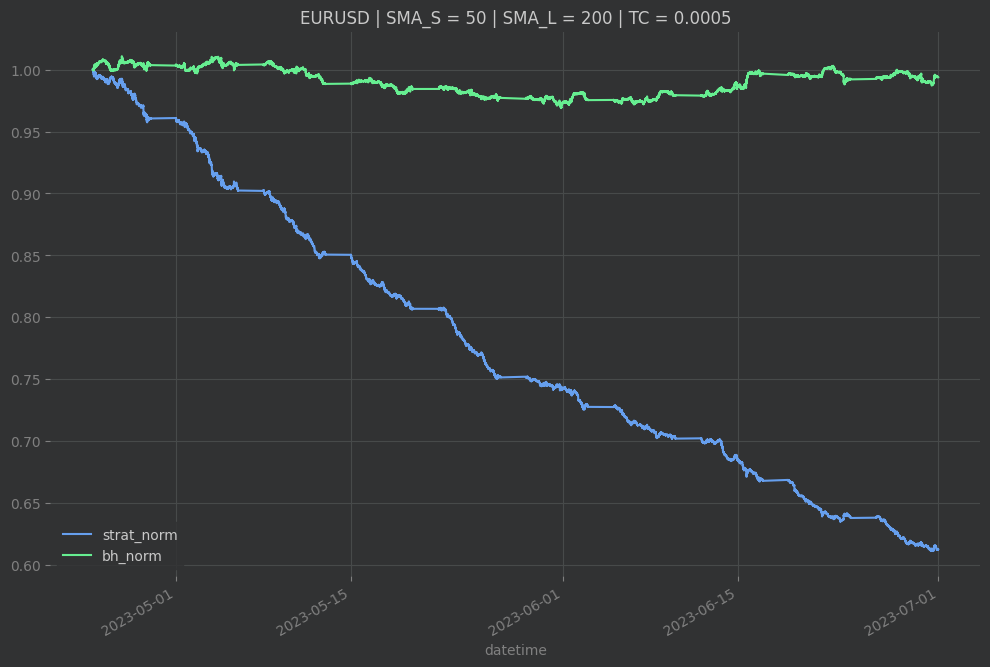

In [45]:
tester.plot_results()

The chart and the outperform(negative) values shows that our strategy grossly underperforms buy-and-hold strategy at minute level. We will still try to optimize and see if it shows better results for optimized parameters.

#### Parameter Optimization

In [46]:
param, results = tester.optimize_parameters((10, 50, 1), (100, 252, 1))

In [47]:
param[0],param[1],results

(49.0, 251.0, 0.67731)

#### Backtesting with optimized parameters

In [48]:
tester = SMABacktester(filepath, symbol, int(param[0]),int(param[1]), start, end, ptc, sell_pos = -1)
tester

SMABacktester(symbol = EURUSD, SMA_S = 49, SMA_L = 251, start = 2023-04-24, end = 2023-06-30)

In [49]:
strategy_returns, outperform = tester.test_strategy()
print(strategy_returns, outperform)

0.67731 -0.315844


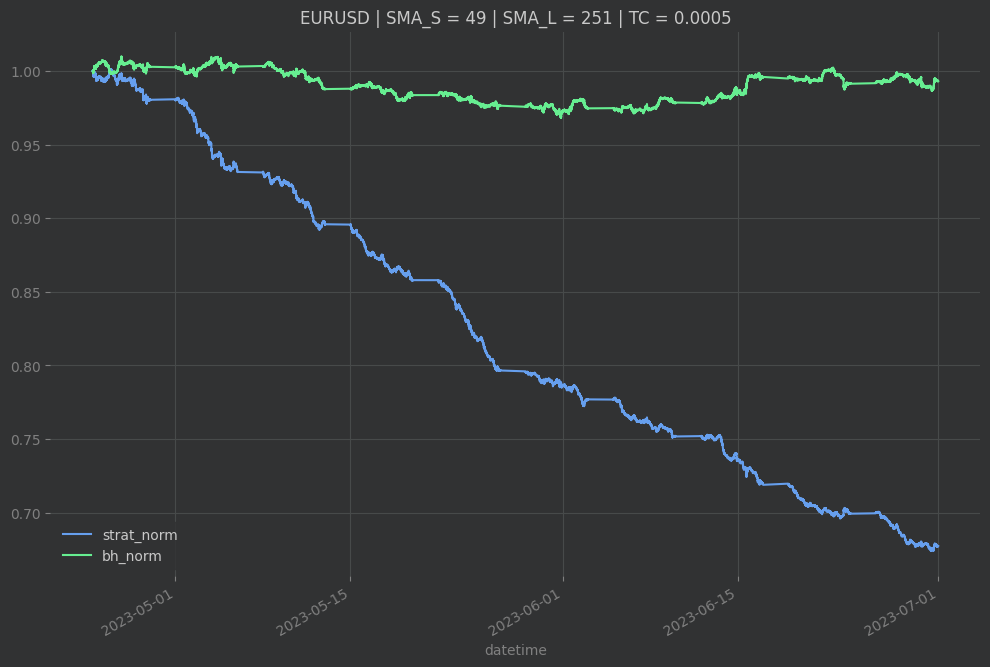

In [50]:
tester.plot_results()

__Forward testing would not be required as backtesting did not produce positive results.__

### Summary
__The chart and the outperform(negative) values from both standard and optimized parameters shows that our strategy underperforms buy-and-hold strategy at minute level. Now lets test the same strategy with data at 5 minute granularity.__

### 4. SMA Crossover strategy with day level close price - Objects Oriented approach

We will be using SMABacktesterDaily() class instead of SMABacktester() class for our analyis as day level data does not require timestamp.

In [51]:
class SMABacktesterDaily(): 
    ''' Class for the vectorized backtesting of SMA-based trading strategies.

    Attributes
    ==========
    filepath: str
        filename/path of the local csv file
    symbol: str
        ticker symbol to be tested
    SMA_S: int
        time window in days for shorter SMA
    SMA_L: int
        time window in days for longer SMA
    start: str
        start date for analysis
    end: str
        end date for analysis
    tc: float
        proportional transaction/trading costs per trade
    sell_pos: either -1 (default) or 0
        allow(-1) or disable (0) short-selling 
        
    Methods
    =======
    get_data:
        loads and prepares the data from csv
        
    set_parameters:
        sets one or two new SMA parameters und updates time-series
        
    test_strategy:
        runs the backtest for the SMA-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy-and-hold
        
    update_and_run:
        updates SMA parameters and returns the negative multiple (for minimizatio)
        
    optimize_parameters:
        implements a brute force optimization for the two SMA parameters
    '''
    
    def __init__(self, filepath, symbol, SMA_S, SMA_L, start, end, tc, sell_pos = -1):
        self.filepath = filepath
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.tc = tc
        self.sell_pos = sell_pos
        self.results = None 
        self.get_data()
        
    def __repr__(self):
        return "SMABacktesterDaily(symbol = {}, SMA_S = {}, SMA_L = {}, start = {}, end = {})".format(self.symbol, self.SMA_S, self.SMA_L, self.start, self.end)
  
    def get_data(self):
        ''' Loads and prepares the data.
        '''
        raw = pd.read_csv(self.filepath, delimiter="\t")
        raw['<DATE>'] = pd.to_datetime(raw['<DATE>'])
        raw.set_index('<DATE>', inplace=True)
        
        raw = raw.iloc[:,:-2]
        
        
        raw = raw.loc[self.start:self.end]
        
        
        raw.columns = ["open", "high", "low", "close", "volume"]
        raw.index.name = "date"

        columns_to_keep = raw.columns[[3]]
        raw = raw[columns_to_keep]
        raw.columns = ["price"]
        #raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and resp. time series.
        '''
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        
        data = self.data.copy().dropna()
        
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, self.sell_pos)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["bh_norm"] = data["returns"].cumsum().apply(np.exp)
        data["strat_norm"] = data["strategy"].cumsum().apply(np.exp)
        
        self.results = data
        
        perf = data["strat_norm"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["bh_norm"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy
        compared to buy-and-hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {} | TC = {}".format(self.symbol, self.SMA_S, self.SMA_L, self.tc)
            self.results[["strat_norm", "bh_norm"]].plot(title=title, figsize=(12, 8))
        
    def update_and_run(self, SMA):
        ''' Updates SMA parameters and returns the negative multiple (for minimization algorithm).

        Parameters
        ==========
        SMA: tuple
            SMA parameter tuple
        '''
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, SMA1_range, SMA2_range):
        ''' Finds global maximum given the SMA parameter ranges.

        Parameters
        ==========
        SMA1_range, SMA2_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (SMA1_range, SMA2_range), finish=None)
        return opt, -self.update_and_run(opt)

In [52]:
#file with day level data exported from MT5
filepath = "datasets/EURUSD_Daily_201101030000_202307280000.csv"

#### Parameter values for SMA strategy including cost

In [53]:
start = "2011-01-03"
end = "2019-12-31"

In [54]:
symbol = "EURUSD"

In [55]:
sma_s = 50
sma_l = 200

In [56]:
#cost
ptc = 0.0005 

#### Backtesting

In [57]:
tester = SMABacktesterDaily(filepath, symbol, sma_s, sma_l, start, end, ptc, sell_pos = -1)
tester

SMABacktesterDaily(symbol = EURUSD, SMA_S = 50, SMA_L = 200, start = 2011-01-03, end = 2019-12-31)

In [58]:
strategy_returns, outperform = tester.test_strategy()
print(strategy_returns, outperform)

1.07116 0.232529


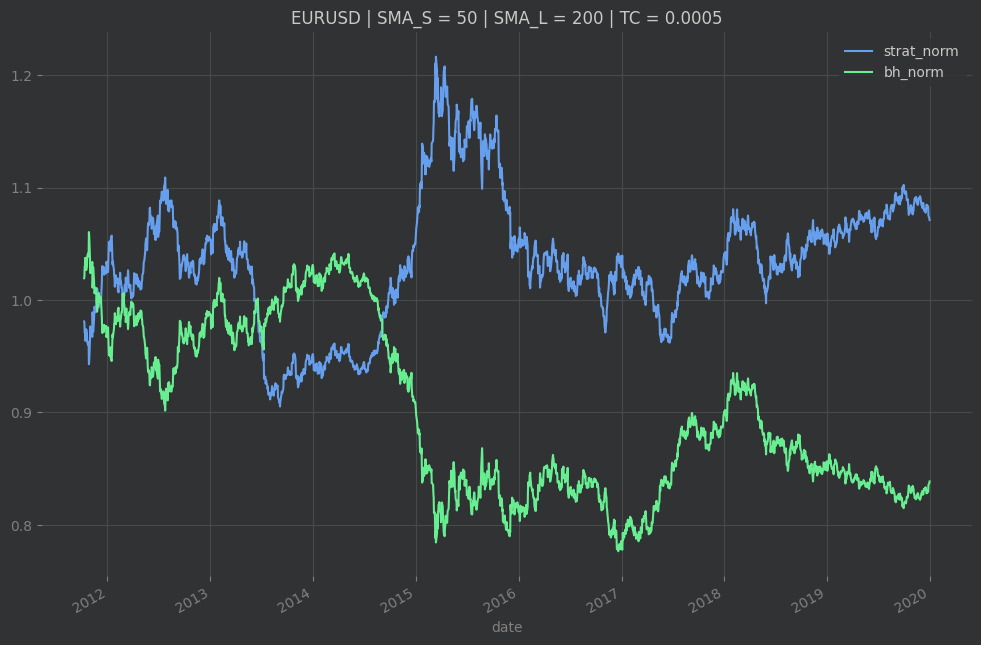

In [59]:
tester.plot_results()

#### Parameter Optimization

In [60]:
param, results = tester.optimize_parameters((10, 50, 1), (100, 252, 1))

In [61]:
param[0],param[1],results

(47.0, 243.0, 1.429527)

#### Backtesting with optimized parameters

In [62]:
tester = SMABacktesterDaily(filepath, symbol, int(param[0]),int(param[1]), start, end, ptc, sell_pos = -1)
tester

SMABacktesterDaily(symbol = EURUSD, SMA_S = 47, SMA_L = 243, start = 2011-01-03, end = 2019-12-31)

In [63]:
strategy_returns, outperform = tester.test_strategy()
print(strategy_returns, outperform)

1.429527 0.593416


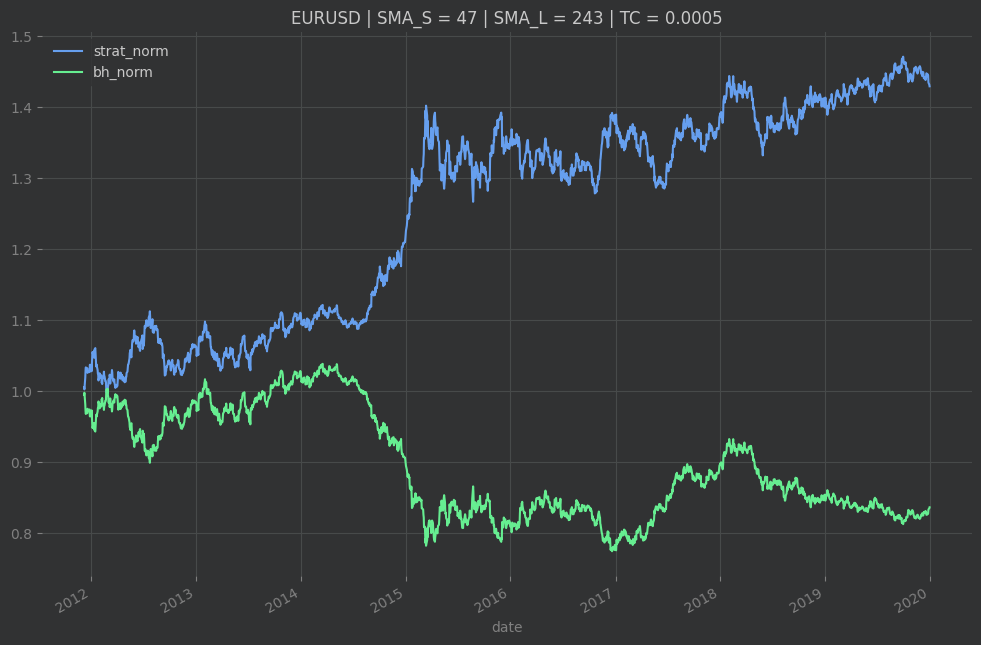

In [64]:
tester.plot_results()

__The chart and the outperform(positive) values from both standard and optimized parameters shows that our strategy outperforms buy-and-hold strategy at day level. We can now proceed with forward testing to see the strategy is still profitable for testing data too.__

### Forward Testing
Problem: __"In-Sample"__ Testing <br>
Better: __"Out-Sample"__/Forward Testing (Split up into Optimization Period and Testing Period)

In [65]:
opt_start = "2020-01-01"
opt_end = "2023-07-28"

In [66]:
tester = SMABacktesterDaily(filepath, symbol, int(param[0]),int(param[1]), opt_start, opt_end, ptc, sell_pos = -1)
tester

SMABacktesterDaily(symbol = EURUSD, SMA_S = 47, SMA_L = 243, start = 2020-01-01, end = 2023-07-28)

In [67]:
strategy_returns, outperform = tester.test_strategy()
print(strategy_returns, outperform)

1.105675 0.196103


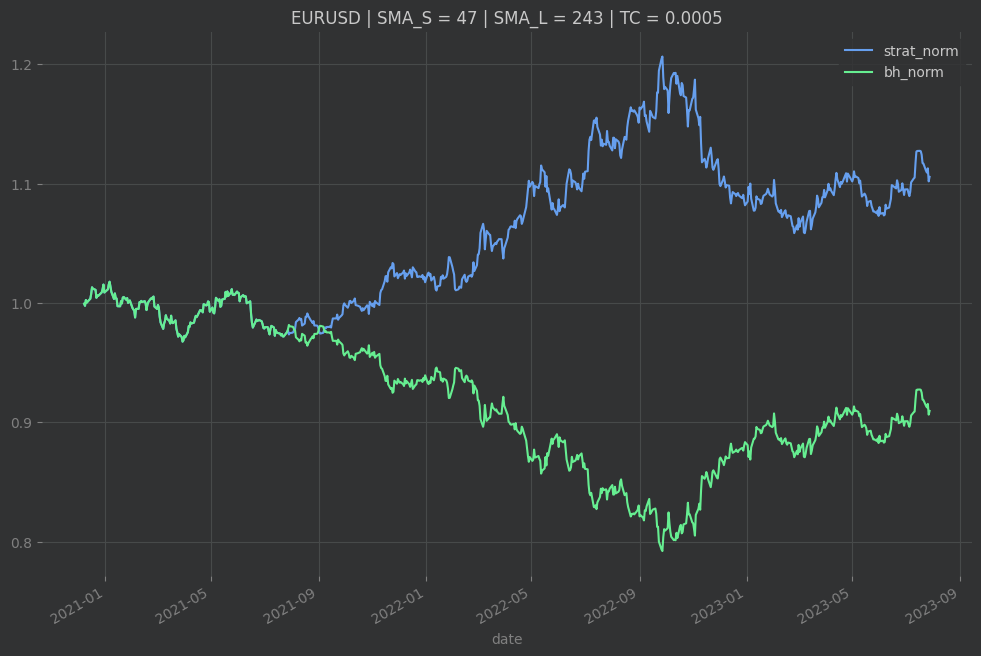

In [68]:
tester.plot_results()

### Conclusion
__The chart and the outperform(positive) values from both standard and optimized parameters shows that our strategy outperforms buy-and-hold strategy at day level with both backtesting and forward testing.We can consider this strategy for trasing EURUSD Forex__